In [1]:
# Date: 2021-08-06 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
df = pd.read_csv("Pricing_Index_(Fixed).csv")

In [41]:
df.head(1)

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,01-01-1990,Ontario,2016A000235,Total (house and land),"Index, 201612=100",347,units,0,v111955490,17.1,65.4,NaN,NaN,NaN,1


In [42]:
df = df.drop(['DGUID','UOM','UOM_ID','SCALAR_FACTOR','SCALAR_ID','VECTOR','COORDINATE',
      'STATUS','SYMBOL','TERMINATED','DECIMALS'], axis=1)

In [43]:
#Simple Data Cleaning
#Check for Nulls // Duplicates
print(df.isnull().sum())
print("Number of Duplicates",df.duplicated().sum())
df.dtypes

REF_DATE                     0
GEO                          0
New housing price indexes    0
VALUE                        0
dtype: int64
Number of Duplicates 0


REF_DATE                      object
GEO                           object
New housing price indexes     object
VALUE                        float64
dtype: object

In [58]:
#df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])  
#Seperating Table my Years
df1990 = df[(df['REF_DATE'] >= '1990-01-01') & (df['REF_DATE'] < '2000-01-01')]
df2000 = df[(df['REF_DATE'] >= '2000-01-01') & (df['REF_DATE'] < '2010-01-01')]
df2010 = df[(df['REF_DATE'] >= '2010-01-01') & (df['REF_DATE'] < '2020-01-01')]
df2020 = df[(df['REF_DATE'] >= '2020-01-01') & (df['REF_DATE'] < '2030-01-01')]

In [71]:
# Seperating tables by Land only and House only
df1990LAN = df1990[df1990['New housing price indexes'].str.contains("Land only")]
df1990HOU = df1990[df1990['New housing price indexes'].str.contains("House only")]
df2000LAN = df2000[df2000['New housing price indexes'].str.contains("Land only")]
df2000HOU = df2000[df2000['New housing price indexes'].str.contains("House only")]
df2010LAN = df2010[df2010['New housing price indexes'].str.contains("Land only")]
df2010HOU = df2010[df2010['New housing price indexes'].str.contains("House only")]

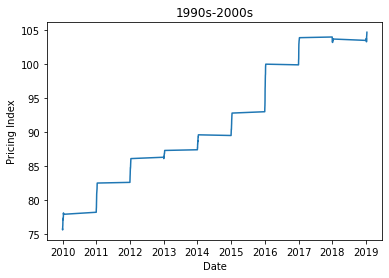

In [70]:
plt.plot(df2010HOU['REF_DATE'],df2010HOU['VALUE'])
plt.title('1990s-2000s')
plt.xlabel('Date')
plt.ylabel('Pricing Index')
plt.show()

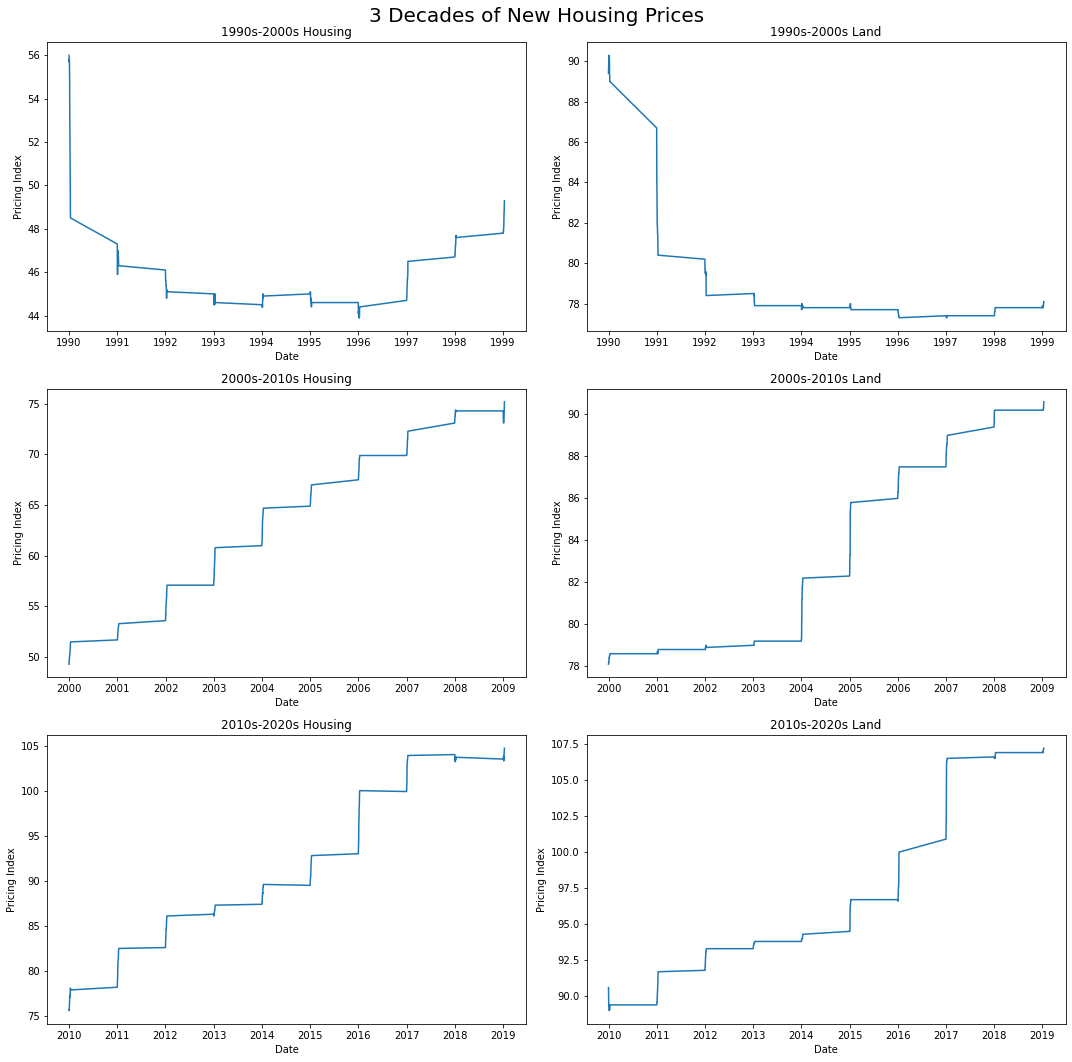

In [77]:
fig = plt.figure(figsize=(15,15)) 
fig_dims = (3, 2)
plt.suptitle('3 Decades of New Housing Prices', fontsize=20)

V1 = plt.subplot2grid(fig_dims, (0, 0))

plt.plot(df1990HOU['REF_DATE'],df1990HOU['VALUE'])
V1.set_title('1990s-2000s Housing')
V1.set_xlabel('Date')
V1.set_ylabel('Pricing Index')

V2 = plt.subplot2grid(fig_dims, (0, 1))

plt.plot(df1990LAN['REF_DATE'],df1990LAN['VALUE'])
V2.set_title('1990s-2000s Land')
V2.set_xlabel('Date')
V2.set_ylabel('Pricing Index')

V3 = plt.subplot2grid(fig_dims, (1, 0))

plt.plot(df2000HOU['REF_DATE'],df2000HOU['VALUE'])
V3.set_title('2000s-2010s Housing')
V3.set_xlabel('Date')
V3.set_ylabel('Pricing Index')

V4 = plt.subplot2grid(fig_dims, (1, 1))

plt.plot(df2000LAN['REF_DATE'],df2000LAN['VALUE'])
V4.set_title('2000s-2010s Land')
V4.set_xlabel('Date')
V4.set_ylabel('Pricing Index')

V5 = plt.subplot2grid(fig_dims, (2, 0))

plt.plot(df2010HOU['REF_DATE'],df2010HOU['VALUE'])
V5.set_title('2010s-2020s Housing')
V5.set_xlabel('Date')
V5.set_ylabel('Pricing Index')

V6 = plt.subplot2grid(fig_dims, (2, 1))

plt.plot(df2010LAN['REF_DATE'],df2010LAN['VALUE'])
V6.set_title('2010s-2020s Land')
V6.set_xlabel('Date')
V6.set_ylabel('Pricing Index')

plt.tight_layout()
plt.show()

In [143]:
#SELF NOTE ***DONT RUN AGAIN***
N = 12
df1990HCHN = df1990HOU.groupby(df1990HOU.index // N).sum()
df1990LCHN = df2000LAN.groupby(df1990LAN.index // N).sum()
df2000HCHN = df2000HOU.groupby(df2000HOU.index // N).sum()
df2000LCHN = df2000LAN.groupby(df2000LAN.index // N).sum()
df2010HCHN = df2010HOU.groupby(df2010HOU.index // N).sum()
df2010LCHN = df2010LAN.groupby(df2010LAN.index // N).sum()


In [163]:
# df1990HCHN.drop(df1990HCHN.tail(1).index,inplace=True) # drop last n rows
# df1990LCHN.drop(df1990LCHN.tail(1).index,inplace=True)
# df2000HCHN.drop(df2000HCHN.tail(1).index,inplace=True)
# df2000LCHN.drop(df2000LCHN.tail(1).index,inplace=True)
# df2010HCHN.drop(df2010HCHN.tail(1).index,inplace=True)
# df2010LCHN.drop(df2010LCHN.tail(1).index,inplace=True)


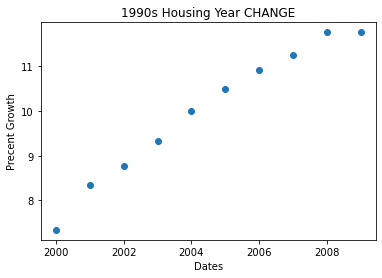

In [168]:
xAxis1990 = list(range(1990, 2000))
xAxis2000 = list(range(2000, 2010))
xAxis2010 = list(range(2010, 2020))

plt.scatter(xAxis2000,df2000HCHN["VALUE"]/df2000HCHN["VALUE"].sum()*100)
plt.title("1990s Housing Year CHANGE")
plt.xlabel("Dates")
plt.ylabel('Precent Growth')
plt.show()
